# Large omics mock exam - solutions

The official exam will take 3 hours. This test exam only 2 hours. Questions will be similar to this exam, but the official exam will have a number of additional theoretical questions. 

**Note:** 

* The exam is open book, open internet. However the use of any communication tool (chat, mail, etc) is strictly forbidden - you will automatically fail the exam.
* You are allowed to use Github during the exam - but do not post any comments without consulting me (for example to correct an obvious mistake).
* For all questions - please provide comments describing what you are plannning to do. Even if you get stuck - add comments describing the followup steps - If I understand your thought process - I can still give you a partial score.

You will be expected to upload the following files to a Toledo Mock Exam Assignment (the mock exam will not be graded - but you can upload anyway to practice. Please upload:

* This ipython notebook with your answers. (download using `Jupyter menu / File / Download as / Notebook (.ipynb)`) 
* An HTML copy of this notebook (download using `Jupyter menu / File / Download as / HTML (.html)`) - Note you must zip this file prior to upload, Toledo does not allow html file uploads.
* Exercise 1:
    * Your new Snakemake file (`Snakefile`)
    * `indels.0.png`
* Exercise 3:
    * Variant impact plots for NOTCH1 and OLFM1

Do not leave uploading files to the last minute - the assignment will automatically close. You are allowed multiple uploads - last one counts.


## Create and work in an work folder.

Prior to starting the exam make sure you create a work folder:

```
mkdir -p $VSC_DATA/test_exam_2023
cd $VSC_DATA/test_exam_2023
```

Subsequently, copy this jupyter notebook to that folder - and open it again in jupyter.

Best of luck, Mark

## Preparation

### Data required

Copy the data files to your work folder:

```
cd $VSC_DATA/test_exam_2023 
cp -r /staging/leuven/stg_00079/teaching/mock_exam/2023/* .
```

###  Terminal/Conda

Do your (CPU intensive) command line work in a VSC interactive session.

For **all** command line work (including snakemake) - make sure you use the correct conda environment by running the following in your shell:

    export PATH=/staging/leuven/stg_00079/teaching/miniconda3/envs/large_omics_2023_b/bin:$PATH
    
You can check if you have the correct kernel loaded by running:

    which python
    
Which should yield `/staging/leuven/stg_00079/teaching/miniconda3/envs/large_omics_2023_b/bin/python`


### Jupyter

Ensure you use the correct kernel for the jupyter work! You can confirm you have the correct kernel by running (in python):

    import sys
    sys.executable
    
Which should yield `/staging/leuven/stg_00079/teaching/miniconda3/envs/large_omics_2023_b/bin/python`

In [1]:
import sys
sys.executable

'/staging/leuven/stg_00079/teaching/miniconda3/envs/large_omics_2023_b/bin/python'

### Import a few modules
(do not forget to execute the cell below!)

In [2]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1 - Snakemake

In your exam folder you wil a snakemake folder containing the workflow definition (`snakemake/Snakefile`). The Snakefile is exactly the workflow we discussed during this course. The workflow has almost completely executed (except for the snpEff step).

The objective of this question is to add a new analysis step to the Snakemake file.

The Snakemake file will have to run [`bcftools stats`](https://samtools.github.io/bcftools/bcftools.html#stats) and subsequent [`plot-vcfstats`](https://samtools.github.io/bcftools/bcftools.html#plot-vcfstats) to create a number of plots visualizing a number statistics from the VCF file. 

**Note**:

 * You must add **a new [rule](https://snakemake.readthedocs.io/en/stable/snakefiles/rules.html)** to the `Snakefile` - not adapt an existing rule!
 * Ensure the new rule gets automatically executed when running Snakemake without defining a rule.
 * Ensure the stats are executed on the annotated vcf file generated by the snpEff step.
 * Please upload your new `Snakefile` and the generated `indels.0.png` to the Toledo assignment.
 * Make sure all generated output end up in a dedicated subfolder (eg `060.stats`). Copy the output of `ls -lt` on the new snakemake stats output folder in the markdown cell below.

In [3]:
#
# See the `Snakefile_answer` in the Q-A repository
# 

## Question 2 - Extending the SNP database

In the exam folder you will find a notebook called `ParseVCF.ipynb` that was used to create the database `exam.sqlite` - also in the exam folder. Check the `ParseVCF.ipynb` file to see how this database was created. In particular, note the snp identifier format that we use to link tables (in the `snp` column).

In [4]:
dbfile = 'exam.sqlite'
db = sqlite3.connect(dbfile)
pd.read_sql('SELECT * FROM snp LIMIT 5', db)

,snp,chrom,pos,quality,ref,type,alt
0,chr9:127578816:C:T,chr9,127578816,36.1174,C,SNV,T
1,chr9:127578974:A:G,chr9,127578974,422.7380,A,SNV,G
2,chr9:127579080:A:G,chr9,127579080,172.0220,A,SNV,G
3,chr9:127663498:C:T,chr9,127663498,66.0472,C,SNV,T
4,chr9:127674824:G:T,chr9,127674824,24.6981,G,SNV,T


In the exam folder you will also find a file called `dbsnp.tsv` which contains the dbSNP rs-ids for our vcf file. The first few lines look like this:

    chrom  pos        ref  alt  dbsnp
    chr9   127578816  C    T    rs4240419
    chr9   127578974  A    G    rs4240420
    chr9   127579080  A    G    rs4240421
    chr9   127663498  C    T    rs7036307
    chr9   127674824  G    T    None
    chr9   127679143  G    T    None

   
Can you load the `dbsnp.tsv` file as a pandas DataFrame, create a SNP id in exactly the same format as in the rest of the database, and save this into a **new table** into the database?


In [5]:
# First - create a pandas table with the data. This is easy
# as pandas can read csv:

dbsnp = pd.read_csv('dbsnp.tsv', sep="\t")

# Important is to create a 'snp' column with an identifiers
# of exactly the same format. There are many ways to do this:

dbsnp['snp'] = dbsnp['chrom'].astype(str) \
        + ":" + dbsnp['pos'].astype(str) \
        + ":" + dbsnp['ref'] \
        + ":" + dbsnp['alt'] 

# And save the table to your database (as we did for the other 
# tables as well)
print('dbsnp records', 
      dbsnp.to_sql('dbsnp', db, if_exists='replace', index=False))

# show the first few lines - to be sure everything is in order
dbsnp.head()

dbsnp records 3507


,chrom,pos,ref,alt,dbsnp,snp
0,chr9,127578816,C,T,rs4240419,chr9:127578816:C:T
1,chr9,127578974,A,G,rs4240420,chr9:127578974:A:G
2,chr9,127579080,A,G,rs4240421,chr9:127579080:A:G
3,chr9,127663498,C,T,rs7036307,chr9:127663498:C:T
4,chr9,127674824,G,T,None,chr9:127674824:G:T


**Question:** With this new table, can you write a SQL query to find the dbSnp ID of the single HIGH impact variant in the `FAM166A` gene? 


In [6]:
# We need to join the effect & dbsnp tables which we can do 
# on the `snp` column. After that we only need to select
# on the gene name and snp impact.
#
# Because there is more than one FAM166A splice variant 
# with that high impact SNP - I use DISTINCT to prevent
# output of duplicate records. 
#
# There is no need to also join in the `snp` table

pd.read_sql(
    """SELECT DISTINCT 
              dbsnp.dbsnp, 
              snp_effect.gene, 
              snp_effect.impact
         FROM dbsnp, snp_effect
        WHERE dbsnp.snp = snp_effect.snp
          AND snp_effect.gene = "FAM166A"
          and snp_effect.impact = "HIGH"
        LIMIT 5
    """, db)

,dbsnp,gene,impact
0,rs9775264,FAM166A,HIGH


## Question 3 - Visualization

Given the our annotated database in `exam.sqlite` with tables `snp`, `snp_call` and `snp_effect` (the database we created during class):

Can you create a plot showing the distribution of effect types for a given gene name?

* Please formulate this as a function with the name of the gene as an argument (expand the skeleton below)
* Save the generated plot as a PNG image (using the correct `matplotlib` function!).
* Create plots for the genes `NOTCH1` and `OLFM1`, upload the plots to the Toledo Assignment.
* Some SNPs have multiple effects at the same time (for example: `splice_region_variant&intron_variant`) - you can plot these as they are - no need to separate them.
* Note - read this github issue: https://github.com/I0U19A-Large-Omics/Q-A/issues/41 
* Warning - if you think you damaged the sqlite database in the previous step - you can always get a fresh copy from: `/lustre1/project/stg_00079/teaching/mock_exam/exam.sqlite`

In [7]:
dbfile = 'exam.sqlite'
db = sqlite3.connect(dbfile)

Processing gene: NOTCH1
                   snp                              effect
0   chr9:136493394:C:T             downstream_gene_variant
1   chr9:136497184:G:A                  synonymous_variant
2   chr9:136498615:C:T             downstream_gene_variant
3   chr9:136498615:C:T                      intron_variant
4   chr9:136498710:G:A             downstream_gene_variant
..                 ...                                 ...
92  chr9:136523808:A:G  non_coding_transcript_exon_variant
93  chr9:136530005:T:G                      intron_variant
94  chr9:136531587:G:C                      intron_variant
95  chr9:136549395:C:T               upstream_gene_variant
96  chr9:136550010:C:T               upstream_gene_variant

[97 rows x 2 columns]
effect
downstream_gene_variant                 16
intron_variant                          39
missense_variant                         1
non_coding_transcript_exon_variant       8
splice_region_variant&intron_variant     2
Name: snp, dtype: int64

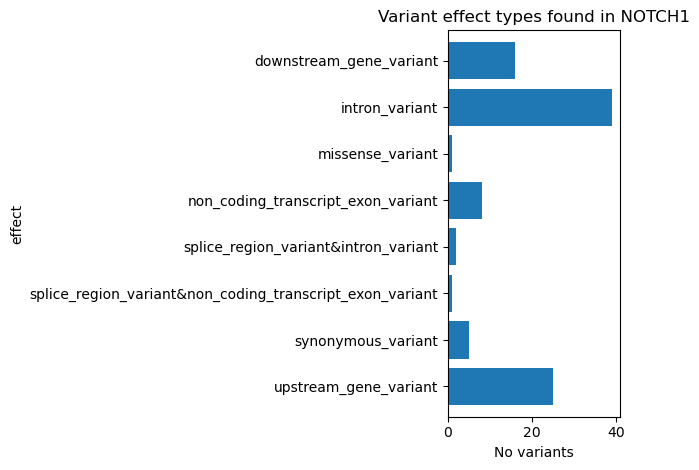

In [8]:
# what data do I require? 
#    In this case this is not a very difficult question:
#    Per gene - a table of the number of times I observe each 
#    snp effect.
   
# What visualization type? 
#    Multiple options are possible. For a one dimensional series of 
#    observations a barplot is a good choices

# What is in the database?
#    We only need the spn_effect table, which has a long list of
#    every effect each SNP has, often repeated as a SNP has the same
#    effect on multiple splice variants. As I do not want to see 
#    these duplicate records, I'll select "DISTINCT snp, effect"
#    where the combination ensure to see each effect each SNP has
#    only once.

# Note - there are effects like 
#   `splice_region_variant&intron_variant` 
# which I'd normally suggest to disentangle - but that is a little
# tricky to do using pandas. I do include this as an example in 
# a second function called `plot_gene_explode` 


def plot_gene(gene_name):
    print(f"Processing gene: {gene_name}")
    
    # get the data from the database.
    SQL = f'''SELECT DISTINCT snp,  effect
                FROM snp_effect 
               WHERE snp_effect.gene = "{gene_name}"
               '''
    res = pd.read_sql(SQL, db)
    
    res2 = res.assign(
        effect=res['effect'].str.split(',')).explode('effect')
    print(res2)
    # aggregate (groupby) over the effect, and then 
    # count (len) the number snp records we have 
    res = res.groupby('effect')['snp'].agg(len)
    
    # My code is - during development - full of print statements
    # if you want something more advanced - check out the
    # logging module.
    print(res.head())
    
    # sort on the effect name - this makes is easier to 
    # look for a specific effect you are interested in.
    # another choice would have been to sort on the number
    # of times an effect occurs, which would make it easier
    # to immediately see which effect is the most abundant.
    # However - that is also directly evident from the barplot
    # so I like this (both are ok though.)
    res = res.sort_index(ascending=False)
    res.plot.barh(width=0.8)
    
    # Add some annotations
    plt.title(f"Variant effect types found in {gene_name}")
    plt.xlabel("No variants")
    
    # Save as a PNG file
    plt.tight_layout() # fix layout issues
    plt.savefig(f"effect_{gene_name}.png")

plot_gene("NOTCH1")

Processing gene: OLFM1
                       snp                              effect
0       chr9:135071454:C:T               upstream_gene_variant
1       chr9:135071455:A:G               upstream_gene_variant
2       chr9:135075855:T:C                      intron_variant
3     chr9:135077073:G:GAA                  frameshift_variant
4     chr9:135077073:G:GAA             downstream_gene_variant
5     chr9:135077073:G:GAA                      intron_variant
6     chr9:135077150:GCA:G                  frameshift_variant
7     chr9:135077150:GCA:G             downstream_gene_variant
8     chr9:135077150:GCA:G                      intron_variant
9       chr9:135078435:T:A             downstream_gene_variant
10      chr9:135078435:T:A                      intron_variant
11      chr9:135086961:T:G               upstream_gene_variant
12      chr9:135086961:T:G                      intron_variant
13      chr9:135090281:T:C                  synonymous_variant
14      chr9:135090281:T:C      

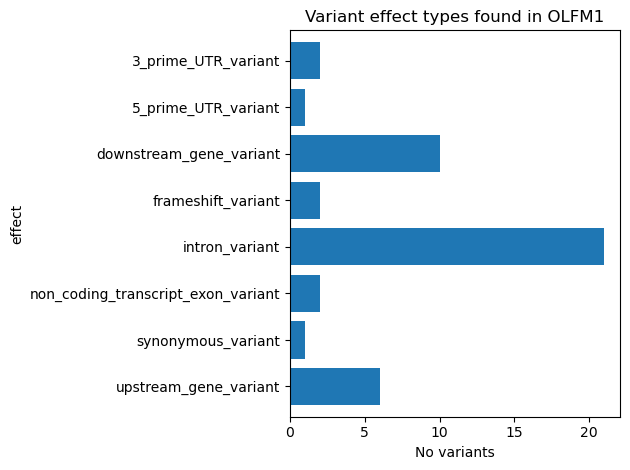

In [9]:
plot_gene("OLFM1");

Processing gene: NOTCH1


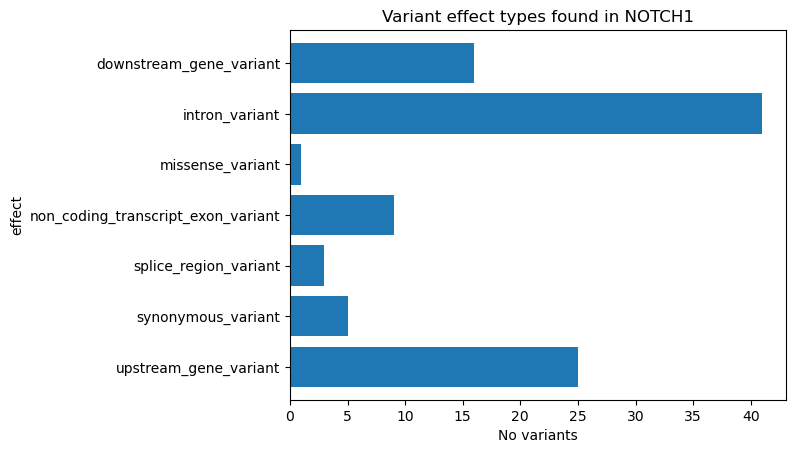

In [10]:
# Now disentangling effects like 
#   `splice_region_variant&intron_variant` 


def plot_gene_explode(gene_name):
    print(f"Processing gene: {gene_name}")
    
    # get the data from the database.
    SQL = f'''SELECT DISTINCT snp,  effect
                FROM snp_effect 
               WHERE snp_effect.gene = "{gene_name}"
               '''
    res = pd.read_sql(SQL, db)
    
    # see here:
    #  https://pandas.pydata.org/pandas-docs/stable/whatsnew/v0.25.0.html#series-explode-to-split-list-like-values-to-rows
    #
    # First step - convert the effect to a list of effects
    # most of the time this will be a list of length 1
    res = res.assign(effect=res['effect'].str.split('&'))
    
    # Second step - "explode" on the effect column
    # so - if this is a list of more than one item, it
    # yields multiple rows - copying all the other columns
    res = res.explode('effect')
    
    # aggregate (groupby) over the effect, and then 
    # count (len) the number snp records we have 
    res = res.groupby('effect')['snp'].agg(len)
    
    # My code is - during development - full of print statements
    # if you want something more advanced - check out the
    # logging module.
    # print(res.head())
    
    # sort on the effect name - this makes is easier to 
    # look for a specific effect you are interested in.
    # another choice would have been to sort on the number
    # of times an effect occurs, which would make it easier
    # to immediately see which effect is the most abundant.
    # However - that is also directly evident from the barplot
    # so I like this (both are ok though.)
    res = res.sort_index(ascending=False)
    res.plot.barh(width=0.8)
    
    # Add some annotations
    plt.title(f"Variant effect types found in {gene_name}")
    plt.xlabel("No variants")
    
    # Save as a PNG file
    plt.savefig(f"effect_{gene_name}.png")

# as you can see - the duplicates dissapeared
plot_gene_explode("NOTCH1")